# 2  导包和数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
job = pd.read_csv(r'/Users/zhaokai/Downloads/job.csv')

display(job.shape,job['city'].unique())

# 取出我们进行后续分析所需的字段
columns = ["positionName", "companyShortName", "city", "companySize", "education", "financeStage",
           "industryField", "salary", "workYear","companyLabelList", "job_detail"]

job = job[columns].drop_duplicates() # 去重

display(job.shape,job.head())

(3140, 52)

array(['北京', '上海', '深圳', '广州', '杭州', '成都', '南京', '武汉', '西安', '厦门', '长沙',
       '苏州', '天津'], dtype=object)

(2939, 11)

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,15k-30k,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据..."
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,10k-18k,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,20k-30k,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,33k-50k,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...
4,数据分析,WPIC,北京,50-150人,本科,未融资,"电商,软件开发",10k-15k,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...


# 3  数据清洗

# 3.1  去掉非数据分析岗的数据

In [2]:
# 数据分析相应的岗位数量,对每一个字符串进行判断和运算
cond = job["positionName"].str.contains("数据分析")  # 职位名中含有“数据分析”关键字
display(job.shape, cond.head())

job = job[cond] # 条件筛选
display(job.shape,job)


(2939, 11)

0    True
1    True
2    True
3    True
4    True
Name: positionName, dtype: bool

(1404, 11)

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,15k-30k,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据..."
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,10k-18k,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,20k-30k,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,33k-50k,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...
4,数据分析,WPIC,北京,50-150人,本科,未融资,"电商,软件开发",10k-15k,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...
...,...,...,...,...,...,...,...,...,...,...,...
3065,数据分析专员,快手,天津,2000人以上,本科,D轮及以上,文娱丨内容,8k-10k,1-3年,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",岗位职责：||1、负责团队业务、人员指标建立及数据体系搭建，以衡量团队运营能力；|| 2...
3069,数据分析专员,林之尚沃,天津,15-50人,本科,不需要融资,医疗丨健康,6k-10k,1-3年,[],【工作职责】：||1、负责数据报表模板建立，并进行常态数据统计、监控，推动数据平台的建立及完...
3070,数据分析实习生,林之尚沃,天津,15-50人,本科,不需要融资,医疗丨健康,2k-4k,不限,[],工作职责：||1、 深入理解业务，负责运营数据分析工作；||2、 跟进运营数据需求，协助搭建...
3071,ETL/大数据/数据分析/实施,格蒂电力,天津,500-2000人,大专,未融资,企业服务,6k-12k,3-5年,"['技能培训', '带薪年假', '绩效奖金', '岗位晋升']",工作职责||1. 负责数据接入、数据整合中的链路配置与调度配置工作。||职位要求||1....


In [3]:
job = job.reset_index(drop=True)
display(job)

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,15k-30k,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据..."
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,10k-18k,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,20k-30k,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,33k-50k,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...
4,数据分析,WPIC,北京,50-150人,本科,未融资,"电商,软件开发",10k-15k,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...
...,...,...,...,...,...,...,...,...,...,...,...
1399,数据分析专员,快手,天津,2000人以上,本科,D轮及以上,文娱丨内容,8k-10k,1-3年,"['股票期权', '弹性工作', '定期体检', '岗位晋升']",岗位职责：||1、负责团队业务、人员指标建立及数据体系搭建，以衡量团队运营能力；|| 2...
1400,数据分析专员,林之尚沃,天津,15-50人,本科,不需要融资,医疗丨健康,6k-10k,1-3年,[],【工作职责】：||1、负责数据报表模板建立，并进行常态数据统计、监控，推动数据平台的建立及完...
1401,数据分析实习生,林之尚沃,天津,15-50人,本科,不需要融资,医疗丨健康,2k-4k,不限,[],工作职责：||1、 深入理解业务，负责运营数据分析工作；||2、 跟进运营数据需求，协助搭建...
1402,ETL/大数据/数据分析/实施,格蒂电力,天津,500-2000人,大专,未融资,企业服务,6k-12k,3-5年,"['技能培训', '带薪年假', '绩效奖金', '岗位晋升']",工作职责||1. 负责数据接入、数据整合中的链路配置与调度配置工作。||职位要求||1....


# 3.2  将薪水转化为数值

文件中薪水是一个区间，这里用薪水区间的均值作为相应职位的薪水

In [4]:
import re
s = '15k-30k'
re.findall(r'(\d+)[k]-(\d+)[k]',s)

[('15', '30')]

In [5]:
# 处理过程
#1、将salary中的字符串均小写化（因为存在8k-16k和8K-16K）
#2、运用正则表达式提取出薪资区间
#3、将提取出来的数字转化为int型
#4、取区间的平均值
job["salary"] = job["salary"].str.lower()\
               .str.extract(r'(\d+)[k]-(\d+)k')\
               .applymap(lambda x:int(x))\
               .mean(axis=1)
display(job.head())

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,22.5,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据..."
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,14.0,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,25.0,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,41.5,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...
4,数据分析,WPIC,北京,50-150人,本科,未融资,"电商,软件开发",12.5,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...


# 3.3  从job_detail中提取出技能要求

将技能分为以下几类：
Python/R
SQL
Tableau
Excel
SPSS、SAS
处理方式： 如果job_detail中含有上述五类，则赋值为1，不含有则为0

In [6]:
job["job_detail"] = job["job_detail"].str.lower().fillna("")  #将字符串小写化，并将缺失值赋值为空字符串

job["Python"] = job["job_detail"].map(lambda x:1 if ('python' in x) else 0)
job["SQL"] = job["job_detail"].map(lambda x:1 if ('sql' in x) or ('hive' in x)  else 0)
job["Tableau"] = job["job_detail"].map(lambda x:1 if 'tableau' in x  else 0)
job["Excel"] = job["job_detail"].map(lambda x:1 if 'excel' in x  else 0)
job['SPSS/SAS'] = job['job_detail'].map(lambda x:1 if ('spss' in x) or ('sas' in x) else 0)
job.head()

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail,Python,SQL,Tableau,Excel,SPSS/SAS
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,22.5,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",1,1,0,1,0
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,14.0,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...,0,1,0,1,1
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,25.0,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...,1,1,0,0,0
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,41.5,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...,1,1,0,0,1
4,数据分析,WPIC,北京,50-150人,本科,未融资,"电商,软件开发",12.5,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...,0,0,0,0,0


# 3.4  处理行业信息

In [7]:
def clean_industry(industry):
    industry = industry.split(",") # 拆分
    if industry[0]=="移动互联网" and len(industry)>1:
        return industry[1]
    else:
        return industry[0]
    
job["industryField"] = job.industryField.map(clean_industry)
job.head()

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail,Python,SQL,Tableau,Excel,SPSS/SAS
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,22.5,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",1,1,0,1,0
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,14.0,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...,0,1,0,1,1
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,25.0,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...,1,1,0,0,0
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,41.5,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...,1,1,0,0,1
4,数据分析,WPIC,北京,50-150人,本科,未融资,电商,12.5,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...,0,0,0,0,0


# 4  综合指标分析

4.1  各城市对数据分析岗位的需求量

In [8]:
# 查看电脑自带的字体
from matplotlib.font_manager import FontManager
fm = FontManager()
[font.name for font in fm.ttflist]

['cmmi10',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'cmsy10',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXNonUnicode',
 'cmex10',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'cmtt10',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXNonUnicode',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXGeneral',
 'cmr10',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'DejaVu Sans',
 'DejaVu Sans',
 'cmb10',
 'DejaVu Sans Display',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'cmss10',
 'DejaVu Serif',
 'Corsiva Hebrew',
 'Noto Sans Old Hungarian',
 'Webdings',
 'Telugu MN',
 'Noto Sans Tifinagh',
 'Phosphate',
 'Noto Sans Imperial Aramaic',
 'Arial',
 'Noto Sans Meetei Mayek',
 'Georgia',
 'STIXIntegralsD',
 'Hiragino Sans',
 'AppleMyungjo',
 'Silom',
 'Noto Sans Vai',
 'Noto Sans Thaana',
 'Malayalam Sangam MN',
 'Hiragino Sans',
 'Wase

In [13]:
# 设置字体
plt.rcParams['font.family'] = 'Songti SC'
plt.rcParams['font.size'] = 20

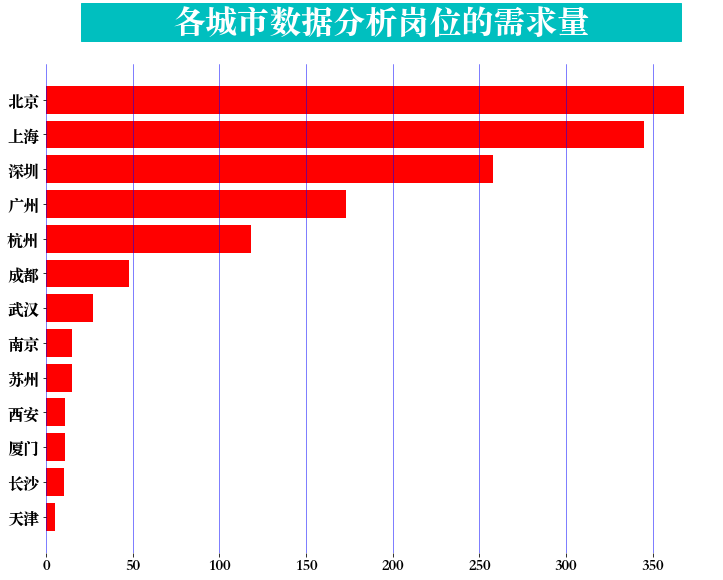

In [14]:
plt.figure(figsize=(12,9))
cities = job['city'].value_counts() # 统计城市工作数量

plt.barh(y = cities.index[::-1],
        width = cities.values[::-1],
        color = 'r')

plt.box(False) # 不显示边框
plt.title(label='           各城市数据分析岗位的需求量           ', 
          fontsize=32, weight='bold', color='white', 
          backgroundcolor='c',pad = 30 )

plt.tick_params(labelsize = 16)
plt.grid(axis = 'x',linewidth = 0.5,color = 'b')

# 4.2  不同细分领域对数据分析岗的需求量

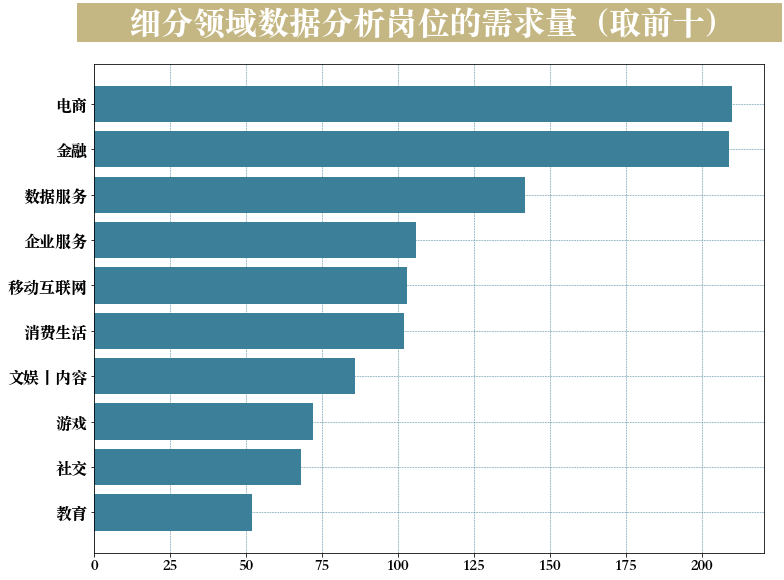

In [15]:
# 获取需求量前10多的领域
industry= job["industryField"].value_counts()[:10]

plt.figure(figsize=(12,9))
plt.barh(y = industry.index[::-1],
         width=industry.values[::-1],
         color = '#3c7f99')

plt.title(label='      细分领域数据分析岗位的需求量（取前十）     ', 
          fontsize=32, weight='bold', color='white', 
          backgroundcolor='#c5b783',ha = 'center',pad = 30)
plt.tick_params(labelsize=16)
plt.grid(lw = 0.5,color = '#3c7f99',ls = '--')

# 4.3  各城市相应岗位的薪资状况

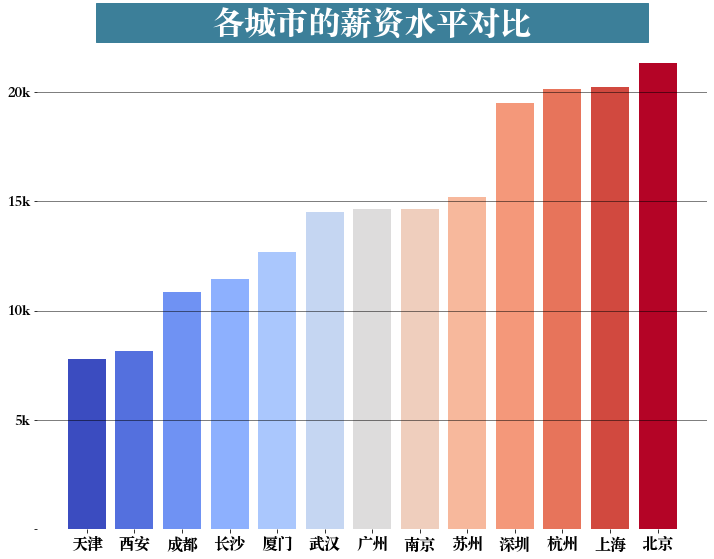

In [18]:
plt.figure(figsize=(12,9))
# 分组，获取薪资，求平均值，排序
city_salary = job.groupby("city")["salary"].mean().sort_values() # 分组聚合运算
# display(city_salary)

plt.bar(x = city_salary.index,height = city_salary.values,
       color = plt.cm.coolwarm(np.linspace(0,1,len(city_salary))))


plt.title(label='              各城市的薪资水平对比              ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#3c7f99')
plt.tick_params(labelsize=16)
plt.grid(axis = 'y',linewidth = 0.5,color = 'black')
plt.yticks(ticks = np.arange(0,25,step = 5,),labels = ['','5k','10k','15k','20k'])
plt.box(False) # 去掉边框

# 4.4  工作经验与薪水的关系

In [19]:
job['workYear'].unique()

array(['3-5年', '1-3年', '1年以下', '不限', '5-10年', '应届毕业生', '10年以上'],
      dtype=object)

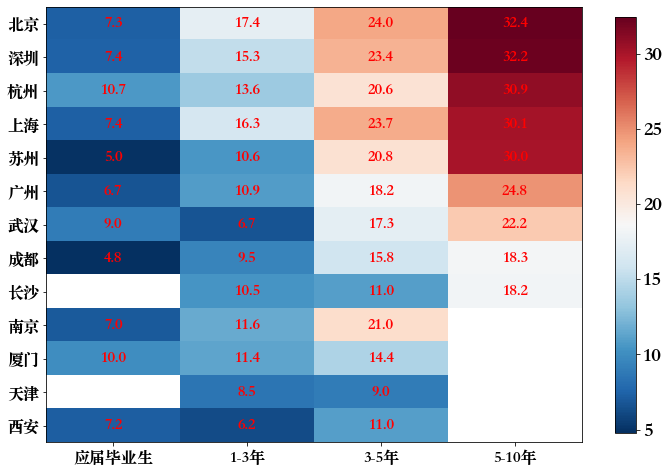

In [20]:
# 透视表，其实就是分组聚合：city然后根据 workYear，默认计算的平均值
work_salary = job.pivot_table(index="city",columns="workYear",values="salary") # 透视表


work_salary = work_salary[["应届毕业生","1-3年","3-5年","5-10年"]]\
              .sort_values(by = '5-10年',ascending = False) # 筛选一部分工作经验

data = work_salary.values
data = np.repeat(data,4,axis = 1) # 重复4次，目的画图，美观，图片宽度拉大
plt.figure(figsize=(12,9))

plt.imshow(data,cmap='RdBu_r')

# 设置刻度
plt.yticks(np.arange(13),work_salary.index)
plt.xticks(np.array([1.5,5.5,9.5,13.5]),work_salary.columns)

# 绘制文本
h,w = data.shape
for x in range(w):
    for y in range(h):
        if (x%4 == 0) and (~np.isnan(data[y,x])):
            text = plt.text(x + 1.5, y, round(data[y,x],1),
                           ha="center", va="center", color='r',fontsize = 16)
            
plt.colorbar(shrink = 0.85)
plt.tick_params(labelsize = 16)

In [21]:
work_salary

workYear,应届毕业生,1-3年,3-5年,5-10年
city,,,,
北京,7.289474,17.361111,24.008475,32.446809
深圳,7.406250,15.268116,23.400000,32.181818
杭州,10.722222,13.619048,20.612245,30.900000
上海,7.357143,16.268868,23.722628,30.097826
苏州,5.000000,10.583333,20.750000,30.000000
广州,6.722222,10.915094,18.237288,24.800000
武汉,9.000000,6.666667,17.300000,22.250000
成都,4.800000,9.500000,15.833333,18.333333
长沙,NaN,10.500000,11.000000,18.250000


In [22]:
data

array([[ 7.28947368,  7.28947368,  7.28947368,  7.28947368, 17.36111111,
        17.36111111, 17.36111111, 17.36111111, 24.00847458, 24.00847458,
        24.00847458, 24.00847458, 32.44680851, 32.44680851, 32.44680851,
        32.44680851],
       [ 7.40625   ,  7.40625   ,  7.40625   ,  7.40625   , 15.26811594,
        15.26811594, 15.26811594, 15.26811594, 23.4       , 23.4       ,
        23.4       , 23.4       , 32.18181818, 32.18181818, 32.18181818,
        32.18181818],
       [10.72222222, 10.72222222, 10.72222222, 10.72222222, 13.61904762,
        13.61904762, 13.61904762, 13.61904762, 20.6122449 , 20.6122449 ,
        20.6122449 , 20.6122449 , 30.9       , 30.9       , 30.9       ,
        30.9       ],
       [ 7.35714286,  7.35714286,  7.35714286,  7.35714286, 16.26886792,
        16.26886792, 16.26886792, 16.26886792, 23.72262774, 23.72262774,
        23.72262774, 23.72262774, 30.09782609, 30.09782609, 30.09782609,
        30.09782609],
       [ 5.        ,  5.        ,  5

# 4.5  学历要求

本科    1166
不限      89
大专      88
硕士      61
Name: education, dtype: int64

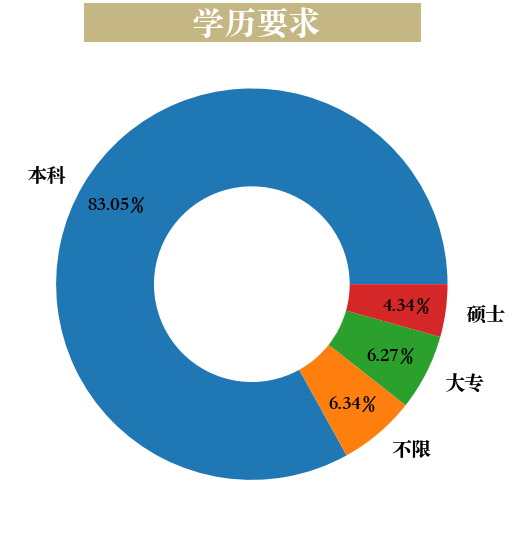

In [23]:
education = job["education"].value_counts(normalize=False)
display(education)

plt.figure(figsize=(9,9))
_ = plt.pie(education, # 数据统计
            labels=education.index,# 标签
            autopct='%0.2f%%',# 显示百分比
            wedgeprops=dict(linewidth=3,width = 0.5),# 设置环
            pctdistance=0.80,# 百分比位置
            textprops = dict(fontsize = 20))# 字体大小

_ = plt.title(label='             学历要求            ', 
          fontsize=32, weight='bold', 
          color='white', backgroundcolor='#c5b783')

# 4.6  技能要求

In [24]:
job.head()

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail,Python,SQL,Tableau,Excel,SPSS/SAS
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,22.5,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",1,1,0,1,0
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,14.0,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...,0,1,0,1,1
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,25.0,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...,1,1,0,0,0
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,41.5,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...,1,1,0,0,1
4,数据分析,WPIC,北京,50-150人,本科,未融资,电商,12.5,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...,0,0,0,0,0


Text(0, 0.5, '技能')

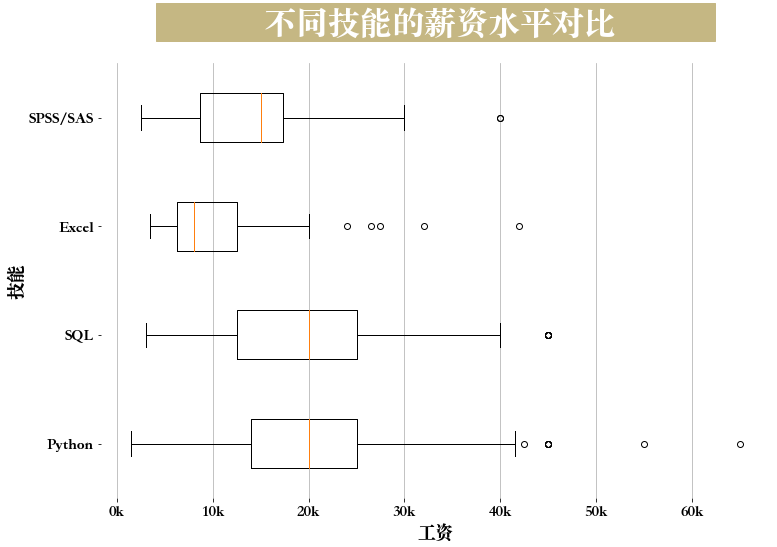

In [32]:
def get_level(x):
    if x["Python"] == 1:
        x["skill"] = "Python"
    elif x["SQL"] == 1:
        x["skill"] = "SQL"
    elif x["Excel"] == 1:
        x["skill"] = "Excel"
    elif x['SPSS/SAS'] == 1:
        x['skill'] = 'SPSS/SAS'
    else:
        x["skill"] = "其他"
    return x
# 可以对DataFrame整体，进行处理，对列进行处理时，声明axis = 1
job = job.apply(get_level,axis=1) # 数据转换


# 获取主要技能
x = job.loc[job.skill!='其他'][['salary','skill']]
cond1 = x['skill'] == 'Python'
cond2 = x['skill'] =='SQL'
cond3 = x['skill'] == 'Excel'
cond4 = x['skill'] == 'SPSS/SAS'

plt.figure(figsize=(12,8))
plt.title(label='             不同技能的薪资水平对比            ', 
          fontsize=32, weight='bold', color='white', 
          backgroundcolor='#c5b783',pad = 30)

plt.boxplot(x = [job.loc[job.skill!='其他']['salary'][cond1],
                job.loc[job.skill!='其他']['salary'][cond2],
                job.loc[job.skill!='其他']['salary'][cond3],
                job.loc[job.skill!='其他']['salary'][cond4]],
           vert = False,labels = ["Python","SQL","Excel",'SPSS/SAS'])

plt.tick_params(axis="both",labelsize=16)
plt.grid(axis = 'x',linewidth = 0.75)
plt.xticks(np.arange(0,61,10), [str(i)+"k" for i in range(0,61,10)])
plt.box(False)
plt.xlabel('工资', fontsize=18)
plt.ylabel('技能', fontsize=18)

# 4.7  大公司对技能要求

In [33]:
job.head()

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail,Python,SQL,Tableau,Excel,SPSS/SAS,skill
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,22.5,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",1,1,0,1,0,Python
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,14.0,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...,0,1,0,1,1,SQL
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,25.0,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...,1,1,0,0,0,Python
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,41.5,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...,1,1,0,0,1,Python
4,数据分析,WPIC,北京,50-150人,本科,未融资,电商,12.5,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...,0,0,0,0,0,其他


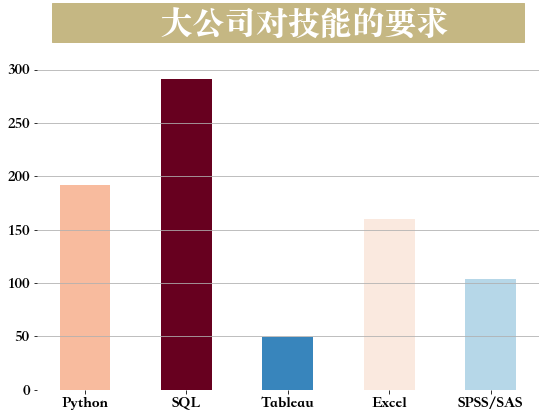

In [39]:
skill_count = job[job['companySize'] == '2000人以上'][['Python','SQL','Tableau','Excel','SPSS/SAS']].sum()

plt.figure(figsize=(9,6))
plt.bar(np.arange(5),skill_count,
        tick_label = ['Python','SQL','Tableau','Excel','SPSS/SAS'],
        width = 0.5,
        color = plt.cm.RdBu_r(skill_count/skill_count.max()))

_ = plt.title(label='             大公司对技能的要求         ', 
          fontsize=32, weight='bold', color='white', 
          backgroundcolor='#c5b783',pad = 30)
plt.tick_params(labelsize=16,)
plt.grid(axis = 'y')
plt.box(False)

# 4.8  不同规模的公司在招人要求上的差异

In [40]:
job.workYear.unique()

array(['3-5年', '1-3年', '1年以下', '不限', '5-10年', '应届毕业生', '10年以上'],
      dtype=object)

In [41]:
job.head()

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail,Python,SQL,Tableau,Excel,SPSS/SAS,skill
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,22.5,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",1,1,0,1,0,Python
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,14.0,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...,0,1,0,1,1,SQL
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,25.0,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...,1,1,0,0,0,Python
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,41.5,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...,1,1,0,0,1,Python
4,数据分析,WPIC,北京,50-150人,本科,未融资,电商,12.5,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...,0,0,0,0,0,其他


In [42]:
from matplotlib import gridspec # 子视图
workYear_map = {
    "5-10年": 5,
    "3-5年": 4,
    "1-3年": 3,
    "1年以下": 2,
    "应届毕业生": 1}
color_map = {
    5:"#ff0000",
    4:"#ffa500",
    3:"#c5b783",
    2:"#3c7f99",
    1:"#0000cd"}

In [43]:
job.head()

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail,Python,SQL,Tableau,Excel,SPSS/SAS,skill
0,数据分析岗,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,22.5,3-5年,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",1,1,0,1,0,Python
1,数据分析,音娱时光,北京,50-150人,本科,A轮,移动互联网,14.0,1-3年,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...,0,1,0,1,1,SQL
2,数据分析,千喜鹤,北京,2000人以上,本科,未融资,消费生活,25.0,3-5年,[],工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...,1,1,0,0,0,Python
3,数据分析,吉林省海生电子商务有限公司,北京,少于15人,本科,不需要融资,电商,41.5,3-5年,[],1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...,1,1,0,0,1,Python
4,数据分析,WPIC,北京,50-150人,本科,未融资,电商,12.5,1-3年,[],职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...,0,0,0,0,0,其他


In [44]:
# 数据如果存在于字典，取出来
cond = job.workYear.isin(workYear_map)
job = job[cond]

job.loc[:,'workYear'] = job.workYear.map(workYear_map) # 工作年限变成数字

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [45]:
# 根据companySize进行排序，人数从多到少
job.loc[:,'companySize'] = job['companySize'].astype('category') # 修改数据类型：类别型
list_custom = ['2000人以上', '500-2000人','150-500人','50-150人','15-50人','少于15人']
# 根据顺序进行类别型排序
job.loc[:,'companySize'] = job['companySize'].cat.reorder_categories(list_custom)
job.sort_values(by = 'companySize',inplace = True,ascending = False)# 降序排序

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

([<matplotlib.axis.YTick at 0x7fd00c543a60>], [Text(0, 0, '  经验：')])

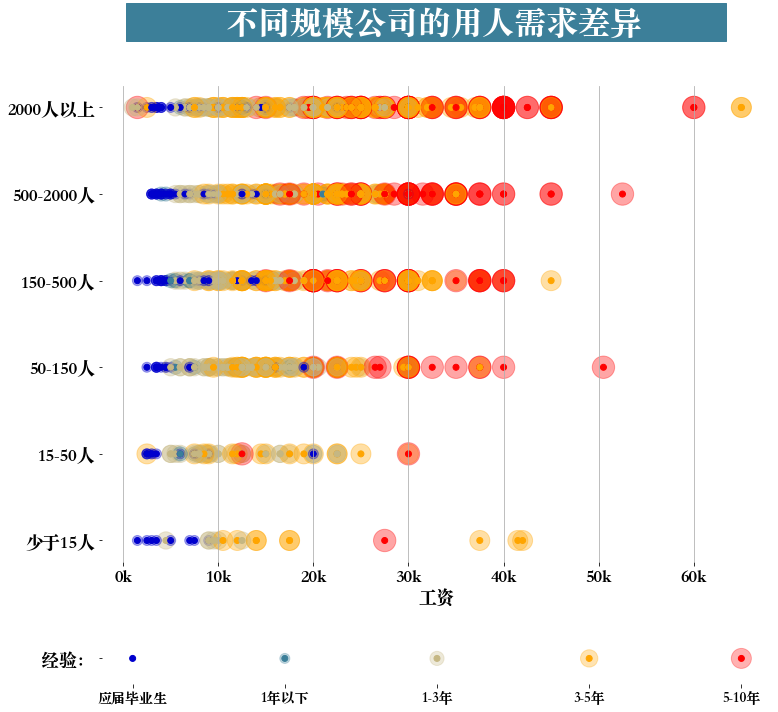

In [46]:
plt.figure(figsize=(12,11))
# 子视图
gs = gridspec.GridSpec(10,1) # 10行，一列
plt.subplot(gs[:8]) # 第一个子视图，取了前8个

plt.suptitle(t='            不同规模公司的用人需求差异          ', 
         fontsize=32, 
         weight='bold', color='white', backgroundcolor='#3c7f99')

# 散点图
plt.scatter(job.salary,job.companySize,
            c = job.workYear.map(color_map),
            s = (job.workYear*100),alpha = 0.35) # 外圈
plt.scatter(job.salary,job.companySize,
            c = job.workYear.map(color_map)) # 内圈

plt.grid(axis = 'x')
plt.xticks(np.arange(0,61,10), [str(i)+"k" for i in range(0,61,10)])
plt.xlabel('工资', fontsize=18)
plt.box(False)
plt.tick_params(labelsize = 18)

# 绘制底部标记
plt.subplot(gs[9:]) # 10个中取最后一个，上面的子视图，有间隔
x = np.arange(5)[::-1]
y = np.zeros(len(x))
s = x*100
plt.scatter(x,y,s=s,c=color_map.values(),alpha=0.3)
plt.scatter(x,y,c=color_map.values())

plt.box(False)
plt.xticks(ticks=x,labels=list(workYear_map.keys()),fontsize=14)
plt.yticks(np.arange(1),labels=['  经验：'],fontsize=18)

In [47]:
job.head()

,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,companyLabelList,job_detail,Python,SQL,Tableau,Excel,SPSS/SAS,skill
1119,软件数据分析,辉滕,广州,少于15人,大专,天使轮,电商,4.5,3,[],岗位职责||1、建立和完善大规模可扩展推荐系统的基础算法、特征、框架、策略和评估体系；||2...,1,1,0,0,0,Python
723,数据分析,苏州精正,深圳,少于15人,本科,不需要融资,企业服务,42.0,4,[],岗位职责（工作内容）||1.收集、整理、统计、记录、分析运营所有各项日常运营指标数据，提供建...,0,0,0,1,1,Excel
339,【兼职】python数据分析机器学习开发,天竞卓逸竞技,北京,少于15人,本科,未融资,金融,9.0,1,[],岗位职责：||消化吸收现有机器学习成功案例，形成可用的金融市场交易项目；||任职要求：||1...,1,0,0,0,0,Python
1115,数据分析实习,南野生鲜,广州,少于15人,本科,未融资,电商,7.5,1,"['扁平管理', '年度旅游', '弹性时间', '帅哥多']",岗位职责：||1、负责设计和开发分布式网络爬虫系统、爬取网页和小程序上的电商销售数据；||2...,1,1,0,0,0,Python
855,数据分析讲师,桃籽数据,深圳,少于15人,本科,未融资,数据服务 移动互联网,12.0,4,[],1工作内容主要是技能输出||2希望你有两年数据分析经验||3熟练excel sql pyth...,1,1,0,1,0,Python
